In [ ]:
conda install -c rdkit rdkit

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdChemReactions as rChem
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.manifold import MDS
import json
import os
from rdkit import DataStructs
import math
from sklearn.metrics import r2_score

In [2]:
with open("doyle_reactions_data.json", "r") as json_file:
    chem_dict = json.load(json_file)

In [3]:
label=[]
products=[]

In [4]:
data = pd.read_csv('AZ_Dataset.csv')
Data = data.values
reactions=[]

In [5]:
fps=[]
for n,r in enumerate(Data):
    product = Data[n, 11]
    if product in products:
        continue
    label.append('AstraZeneca dataset')
    products.append(product)
    mol=Chem.MolFromSmiles(product)
    fp = Chem.RDKFingerprint(mol)
    fps.append(fp)

In [8]:
Doyle=[]
for R, re in enumerate(chem_dict):
    ligand_smiles = None
    pdt = re['product']
    reactant = re['reactants']
    for REC in reactant:
        if REC['category'] == 'ligand':
            ligand_smiles = REC['smiles']
    pdt_smiles = pdt['smiles']
    if pdt_smiles is None or pdt_smiles in Doyle :
        continue
    mol = Chem.MolFromSmiles(pdt_smiles)
    fp = Chem.RDKFingerprint(mol)
    fps.append(fp)
    Doyle.append(pdt_smiles)
    label.append('Doyle dataset')


[<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFBC0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264E43A0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264E4300>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFC10>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFCB0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFC60>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFD00>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFD50>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFDA0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFDF0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFE40>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002B5264EFEE0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect obj

In [9]:
distance_mat = []
for i, fp in enumerate(fps):
    distance_mat.append(DataStructs.BulkTanimotoSimilarity(fps[i], fps, returnDistance=1))
distance_mat = np.array(distance_mat)

(476, 476)


In [10]:
mds = MDS(eps=1e-8,n_components=2, random_state=3, dissimilarity="precomputed",n_jobs = 4, verbose=0,max_iter=10000)
results = mds.fit(distance_mat)
coords = results.embedding_

[[ 4.30557034e-02 -1.40079707e-01]
 [ 4.69054293e-01 -3.06765829e-01]
 [ 2.52289231e-01  3.53841215e-01]
 [-5.07757950e-01 -3.66310471e-01]
 [ 4.55748942e-01 -8.50334588e-02]
 [ 3.87309649e-01 -1.40048998e-01]
 [ 4.11997024e-01 -1.25390035e-01]
 [-2.56075578e-01  4.97595385e-01]
 [ 8.50255452e-02  4.16421829e-02]
 [ 3.44261984e-01 -2.83031252e-01]
 [ 1.22441956e-02  1.95835302e-01]
 [ 4.76885822e-01  9.71835184e-02]
 [ 3.63288132e-01  3.42954249e-01]
 [ 3.45733672e-01  3.55938195e-01]
 [ 2.92300031e-01 -5.94046655e-01]
 [ 4.00248759e-01  1.56366740e-01]
 [ 4.37782607e-01  8.34608769e-02]
 [ 3.81681441e-01  3.18084751e-02]
 [ 3.68028163e-01 -3.92365426e-01]
 [ 1.86237982e-01 -4.20084532e-01]
 [-3.91218291e-01 -2.31343047e-01]
 [ 3.86906874e-01  1.89523935e-01]
 [ 3.68778322e-02 -2.12723552e-01]
 [ 1.85127863e-01 -2.22940780e-01]
 [ 3.68458768e-01 -3.03236733e-01]
 [ 3.85510958e-01  1.20971166e-01]
 [ 3.75962609e-01  1.93701869e-01]
 [ 5.34838131e-01  2.27304095e-01]
 [-1.66900212e-01 -5

In [24]:

cdict = {'Doyle dataset': 'teal', 'AstraZeneca dataset': 'orange','Suzuki dataset':'black'}
colors=[]
for item in label:
    color=cdict[item]
    colors.append(color)

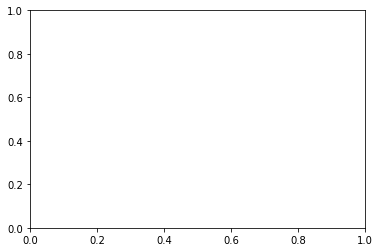

In [25]:
scatter_x=coords[:,0]
scatter_y=coords[:,1]

No handles with labels found to put in legend.


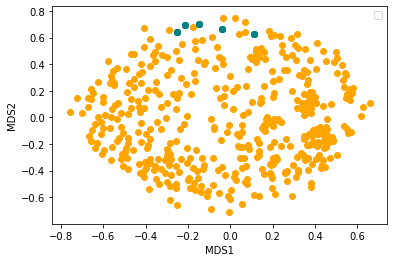

In [34]:
fig, ax = plt.subplots()
ax.legend()
plt.xlabel("MDS1")
plt.ylabel("MDS2")
for g in np.unique(label):
    group = []
    for ix, k in enumerate(label):
        if k == g:
            group.append(ix)
            continue
    ax.scatter(scatter_x[group], scatter_y[group],label=g, c=cdict[g])
plt.show()